In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, Input
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping

%matplotlib inline

Using TensorFlow backend.


In [2]:
nb_classes = 10

# the data, shuffled and split between tran and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

11493376/11490434 [==============================] - 1s 0us/step
X_train original shape (60000, 28, 28)
y_train original shape (60000,)


In [3]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28 ,28 ,1)
X_train = X_train.astype('float32') 
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training shape", X_train.shape)
print("Testing shape", X_test.shape)

Training shape (60000, 28, 28, 1)
Testing shape (10000, 28, 28, 1)


In [4]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [5]:
input_tensor = Input(shape = (28,28,1))
conv1 = Conv2D(32, kernel_size=3,activation = 'relu')(input_tensor)
conv2 = Conv2D(32, kernel_size=3,activation = 'relu')(conv1)
pool1 = MaxPooling2D(pool_size=(2,2))(conv1)
conv3 = Conv2D(64, kernel_size=3,activation = 'relu')(pool1)
conv4 = Conv2D(64, kernel_size=3,activation = 'relu')(conv3)
pool2 = MaxPooling2D(pool_size=(2,2))(conv4)

flatten_layer = Flatten()(pool2)

hidden_layer = Dense(512 , activation = 'relu')(flatten_layer)
drop_layer = Dropout(0.2)(hidden_layer)
pred = Dense(10, activation = 'softmax')(drop_layer)
model = Model(inputs = input_tensor, outputs = pred)
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])
early_stopping = EarlyStopping(patience=0, verbose=1)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 9, 9, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0   

In [6]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [7]:
history = model.fit(X_train, Y_train,batch_size=128, epochs =nb_classes,
          verbose=1,validation_data=(X_test, Y_test), callbacks = [early_stopping])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 155us/step - loss: 0.1769 - accuracy: 0.9452 - val_loss: 0.0495 - val_accuracy: 0.9853
Epoch 2/10
60000/60000 [==============================] - 3s 48us/step - loss: 0.0490 - accuracy: 0.9851 - val_loss: 0.0423 - val_accuracy: 0.9865
Epoch 3/10
60000/60000 [==============================] - 3s 48us/step - loss: 0.0345 - accuracy: 0.9889 - val_loss: 0.0273 - val_accuracy: 0.9909
Epoch 4/10
60000/60000 [==============================] - 3s 48us/step - loss: 0.0242 - accuracy: 0.9923 - val_loss: 0.0278 - val_accuracy: 0.9907
Epoch 00004: early stopping


In [8]:
model.save_weights("model.h5")
print("Save model to disk")

Save model to disk


In [9]:
def create_model():
    input_tensor = Input(shape = (28,28,1))
    conv1 = Conv2D(32, kernel_size=3,activation = 'relu')(input_tensor)
    conv2 = Conv2D(32, kernel_size=3,activation = 'relu')(conv1)
    pool1 = MaxPooling2D(pool_size=(2,2))(conv1)
    conv3 = Conv2D(64, kernel_size=3,activation = 'relu')(pool1)
    conv4 = Conv2D(64, kernel_size=3,activation = 'relu')(conv3)
    pool2 = MaxPooling2D(pool_size=(2,2))(conv4)

    flatten_layer = Flatten()(pool2)

    hidden_layer = Dense(512 , activation = 'relu')(flatten_layer)
    drop_layer = Dropout(0.2)(hidden_layer)
    pred = Dense(10, activation = 'softmax')(drop_layer)
    model = Model(inputs = input_tensor, outputs = pred)
    return model

In [10]:
model_2 = create_model()
model_2.load_weights("model.h5")
print(" Load model from disk")

 Load model from disk


In [11]:
model_2.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [12]:
score = model_2.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.02782147749709402
Test accuracy: 0.9907000064849854


In [13]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

Text(0, 0.5, 'Loss')

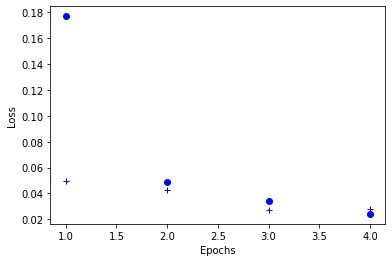

In [17]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo')
plt.plot(epochs, val_loss_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Loss')

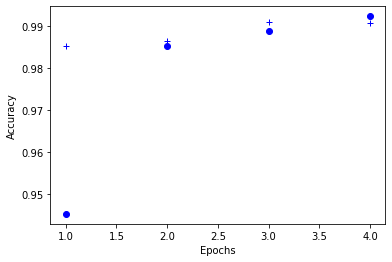

In [18]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo')
plt.plot(epochs, val_acc_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()